## Project: Credit Card Fraud Detection
### This is a binary classification project.
#### Performance metrics: 
Higher precision and recall values (or lower false positives and false negatives respectively) are desired. Hence will use precision-recall curve and Average Precision (AP) values.

#### Dataset and details of problem are available at https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, PrecisionRecallDisplay, accuracy_score, average_precision_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [2]:
# Read the data
df = pd.read_csv("data/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Perform some basic EDA and feature selection

In [4]:
sum(df.isna().sum())

0

No missing values in the dataset

As most features are values after PCA transformation, there is no way to know the true meaning of these features to derive real world inferences. 

Time is the value in seconds between a transaction and the first transaction in the dataset.

This is not going to be helpful as it will keep increasing with more data. If it were time of the day, then maybe it was worth exploring it more.

Amount is the transaction amount, maybe this is worth exploring more.

In [5]:
fraud = df[df["Class"]==1]
valid = df[df["Class"]==0]

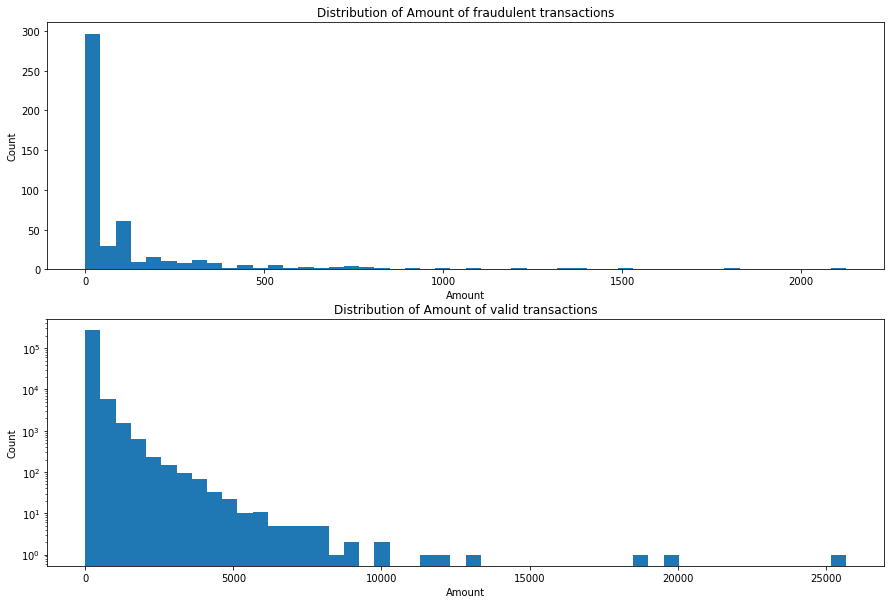

In [6]:
plt.figure(figsize=(15,10))
ax1 = plt.subplot(2,1,1)
ax1.set_xlabel("Amount")
ax1.set_ylabel("Count")
ax1.set_title("Distribution of Amount of fraudulent transactions")
_ = ax1.hist(fraud["Amount"], bins=50)

ax2 = plt.subplot(2,1,2)
ax2.set_xlabel("Amount")
ax2.set_ylabel("Count")
ax2.set_title("Distribution of Amount of valid transactions")
_ = ax2.hist(valid["Amount"], bins=50)

plt.yscale('log')
plt.show();


### Observation:
The fraudelent activity is seen more for low value transactions. The max fraudelent transaction is just above $ 2000.

Whereas the valid transactions are more spread out, but there are also a lot of valid transactions of low value as well.

Look for correlated features with Class

In [7]:
corr = df.corr()

In [8]:
corr.style.background_gradient(cmap='coolwarm')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117396,-0.010593,-0.419618,-0.105260,0.173072,-0.063016,0.084714,-0.036949,-0.008660,0.030617,-0.247689,0.124348,-0.065902,-0.098757,-0.183453,0.011903,-0.073297,0.090438,0.028975,-0.050866,0.044736,0.144059,0.051142,-0.016182,-0.233083,-0.041407,-0.005135,-0.009413,-0.010596,-0.012323
V1,0.117396,1.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.227709,-0.101347
V2,-0.010593,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.531409,0.091289
V3,-0.419618,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.210880,-0.192961
V4,-0.105260,-0.000000,-0.000000,0.000000,1.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.098732,0.133447
V5,0.173072,0.000000,0.000000,-0.000000,-0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.386356,-0.094974
V6,-0.063016,-0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.215981,-0.043643
V7,0.084714,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.397311,-0.187257
V8,-0.036949,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.103079,0.019875
V9,-0.008660,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.044246,-0.097733


In [9]:
columns_to_keep = list(corr["Class"][(corr["Class"]>=0.2) | (corr["Class"]<=-0.2)].index)
columns_to_keep

['V10', 'V12', 'V14', 'V17', 'Class']

In [10]:
df.drop(df.columns.difference(columns_to_keep), axis=1)

,V10,V12,V14,V17,Class
0,0.090794,-0.617801,-0.311169,0.207971,0
1,-0.166974,1.065235,-0.143772,-0.114805,0
2,0.207643,0.066084,-0.165946,1.109969,0
3,-0.054952,0.178228,-0.287924,-0.684093,0
4,0.753074,0.538196,-1.119670,-0.237033,0
...,...,...,...,...,...
284802,4.356170,2.711941,4.626942,1.991691,0
284803,-0.975926,0.915802,-0.675143,-0.025693,0
284804,-0.484782,0.063119,-0.510602,0.313502,0
284805,-0.399126,-0.962886,0.449624,0.509928,0


In [11]:
# Drop columns other than those to keep
df.drop(df.columns.difference(columns_to_keep), axis=1, inplace= True)

In [12]:
# Target feature is Class 0: valid, 1: fraud transaction
X = df.drop("Class", axis=1)
y = df["Class"]

In [13]:
X

,V10,V12,V14,V17
0,0.090794,-0.617801,-0.311169,0.207971
1,-0.166974,1.065235,-0.143772,-0.114805
2,0.207643,0.066084,-0.165946,1.109969
3,-0.054952,0.178228,-0.287924,-0.684093
4,0.753074,0.538196,-1.119670,-0.237033
...,...,...,...,...
284802,4.356170,2.711941,4.626942,1.991691
284803,-0.975926,0.915802,-0.675143,-0.025693
284804,-0.484782,0.063119,-0.510602,0.313502
284805,-0.399126,-0.962886,0.449624,0.509928


In [14]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

Check for class balance

In [15]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [16]:
print("% of fraud transactions in dataset:",sum(y==1)*100/y.count())

% of fraud transactions in dataset: 0.1727485630620034


#### Observation: The dataset is highly imbalanced with more valid transactions and fewer fraud transactions

Perform train test split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [18]:
X_train

,V10,V12,V14,V17
191125,-0.646900,0.023241,0.368247,-0.337180
153710,-1.221469,-2.785047,0.959813,0.757110
261216,-0.199536,0.509291,-0.614734,0.064331
190724,-0.277888,0.055726,-0.318203,0.148204
127492,-0.109470,0.705060,0.457899,-0.204127
...,...,...,...,...
21440,0.346951,-0.167592,-0.139022,0.771636
117583,-0.400162,1.666005,-0.683250,-0.608646
73349,-0.480985,-0.129168,-1.026354,1.589715
267336,0.102675,1.643280,-0.306132,-0.931197


In [19]:
X_test

,V10,V12,V14,V17
169876,0.070050,0.547347,-0.101785,-0.606199
127467,-0.600684,0.710309,0.353867,0.128899
137900,-0.528357,0.111898,-0.649766,-0.344094
21513,0.334853,-0.277872,-0.012238,-1.010534
134700,-0.696578,-0.433200,-1.188354,1.068353
...,...,...,...,...
128956,-0.730249,-0.914732,-1.332257,0.853073
177494,-0.048287,0.371982,0.810268,-0.489215
26287,0.567675,0.139734,-0.651802,-1.086676
198160,-0.041993,0.645202,-0.522172,-0.764955


In [20]:
y_train

191125    0
153710    0
261216    0
190724    0
127492    0
         ..
21440     0
117583    0
73349     0
267336    0
128037    0
Name: Class, Length: 199364, dtype: int64

In [21]:
y_test

169876    0
127467    0
137900    0
21513     0
134700    0
         ..
128956    0
177494    0
26287     0
198160    0
25893     0
Name: Class, Length: 85443, dtype: int64

Check if similar Class distribution is there after split

In [22]:
print("% of fraud transactions in train set:",sum(y_train==1)*100/y_train.count())
print("% of fraud transactions in test set:",sum(y_test==1)*100/y_test.count())

% of fraud transactions in train set: 0.17906944082181336
% of fraud transactions in test set: 0.15800007022225343


In [23]:
# Define a function that will show the performance
def show_performance(y_test, y_pred):
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    cmd = ConfusionMatrixDisplay(cm).plot()

    display = PrecisionRecallDisplay.from_predictions(y_test, y_pred)
    _ = display.ax_.set_title("Precision-Recall curve")

#### Try variety of models and see performance

In [24]:
training_models = {
    'LogisticRegression':LogisticRegression(),
    'KNeighborsClassifier':KNeighborsClassifier(n_neighbors=5),
    'MLPClassifier':MLPClassifier(random_state=1),
    'RandomForestClassifier':RandomForestClassifier(random_state=1),
    'ADABoostClassifier':AdaBoostClassifier(random_state=1),
    'NaiveBayes':GaussianNB(),
    'XGBoost':XGBClassifier(random_state=1)
    }

In [25]:
def train_test_compare(X_train, y_train, X_test, y_test):

    models_used = []
    training_acc = []
    testing_acc = []
    training_ap = []
    testing_ap = []

    for model, clf in training_models.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        test_acc = accuracy_score(y_test, y_pred)
        test_ap = average_precision_score(y_test, y_pred)
        train_pred =  clf.predict(X_train)
        train_acc = accuracy_score(y_train, train_pred)
        train_ap = average_precision_score(y_train, train_pred)

        print(model, 'Model')
        show_performance(y_test, y_pred)
        print('----------------------------------------------------------------')
        print('----------------------------------------------------------------')

        models_used.append(model)
        training_acc.append(train_acc)
        testing_acc.append(test_acc)
        training_ap.append(train_ap)
        testing_ap.append(test_ap)


    results = pd.DataFrame({"model": models_used, "train_accuracy": training_acc, "test_acc": testing_acc, "train_AP": training_ap,
                           "test_AP":testing_ap})
    
    return results

LogisticRegression Model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.84      0.55      0.66       135

    accuracy                           1.00     85443
   macro avg       0.92      0.77      0.83     85443
weighted avg       1.00      1.00      1.00     85443

----------------------------------------------------------------
----------------------------------------------------------------
KNeighborsClassifier Model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.88      0.73      0.80       135

    accuracy                           1.00     85443
   macro avg       0.94      0.87      0.90     85443
weighted avg       1.00      1.00      1.00     85443

----------------------------------------------------------------
----------------------------------------------------------------
MLPClassifier Model
              

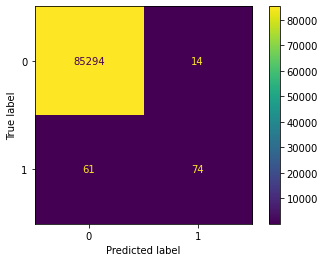

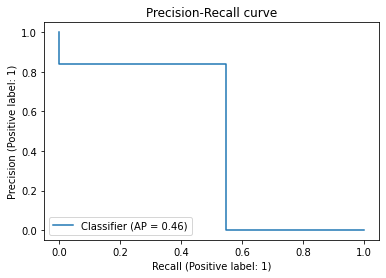

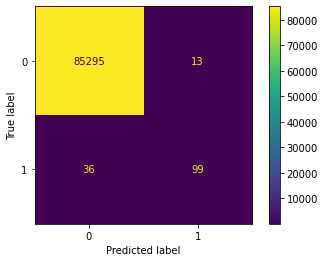

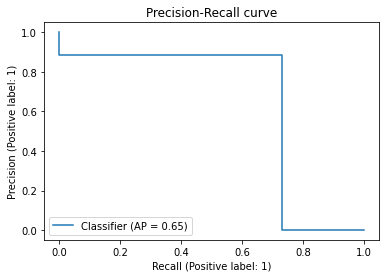

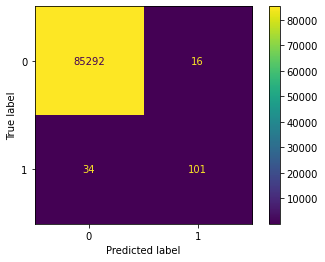

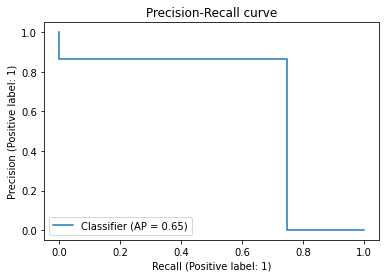

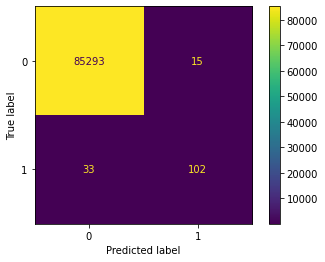

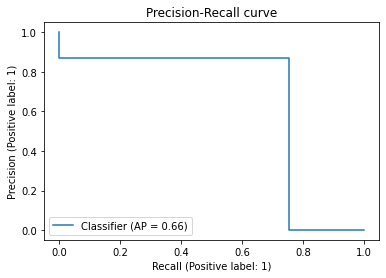

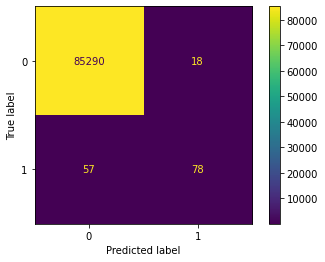

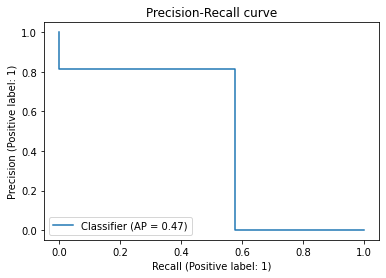

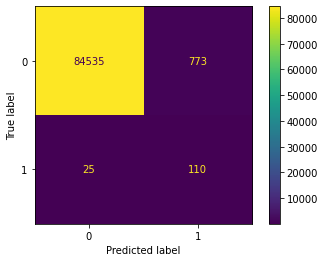

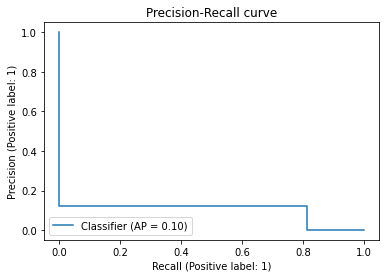

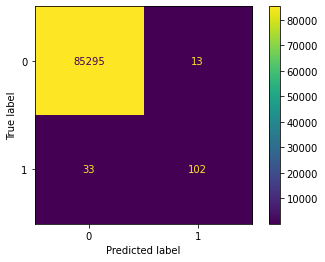

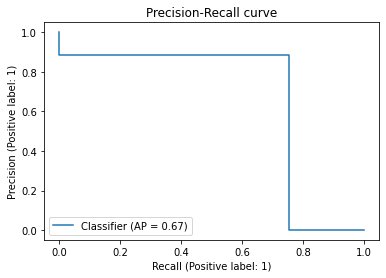

In [26]:
results = train_test_compare(X_train, y_train, X_test, y_test)

In [27]:
display(results)

,model,train_accuracy,test_acc,train_AP,test_AP
0,LogisticRegression,0.999142,0.999122,0.530239,0.461657
1,KNeighborsClassifier,0.999594,0.999427,0.775251,0.648636
2,MLPClassifier,0.999418,0.999415,0.691914,0.646235
3,RandomForestClassifier,1.000000,0.999438,1.000000,0.659076
4,ADABoostClassifier,0.999162,0.999122,0.553083,0.470112
5,NaiveBayes,0.991006,0.990660,0.129033,0.101798
6,XGBoost,0.999829,0.999462,0.904994,0.670531


### Try imbalance mitigation techniques

#### Under Sampling

In [28]:
from collections import Counter
from imblearn.under_sampling import NearMiss

In [29]:
us = NearMiss(sampling_strategy=0.8) # values closer to 1 lead to perfectly balanced dataset
#0.8 x Majority_class_after_sampling = Minority_class_before_sampling

X_train_us, y_train_us = us.fit_resample(X_train, y_train)
print("Class distribution before:",Counter(y_train))
print("Class distribution after:",Counter(y_train_us))

Class distribution before: Counter({0: 199007, 1: 357})
Class distribution after: Counter({0: 446, 1: 357})


LogisticRegression Model
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85308
           1       0.10      0.83      0.18       135

    accuracy                           0.99     85443
   macro avg       0.55      0.91      0.59     85443
weighted avg       1.00      0.99      0.99     85443

----------------------------------------------------------------
----------------------------------------------------------------
KNeighborsClassifier Model
              precision    recall  f1-score   support

           0       1.00      0.61      0.76     85308
           1       0.00      0.92      0.01       135

    accuracy                           0.61     85443
   macro avg       0.50      0.76      0.38     85443
weighted avg       1.00      0.61      0.76     85443

----------------------------------------------------------------
----------------------------------------------------------------


C:\Users\Padmakar\anaconda3\envs\ML_projects\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier Model
              precision    recall  f1-score   support

           0       1.00      0.56      0.72     85308
           1       0.00      0.94      0.01       135

    accuracy                           0.56     85443
   macro avg       0.50      0.75      0.36     85443
weighted avg       1.00      0.56      0.72     85443

----------------------------------------------------------------
----------------------------------------------------------------
RandomForestClassifier Model
              precision    recall  f1-score   support

           0       1.00      0.25      0.40     85308
           1       0.00      0.99      0.00       135

    accuracy                           0.25     85443
   macro avg       0.50      0.62      0.20     85443
weighted avg       1.00      0.25      0.40     85443

----------------------------------------------------------------
----------------------------------------------------------------
ADABoostClassifier Model
            

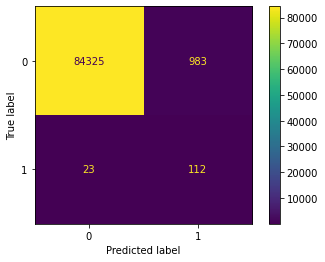

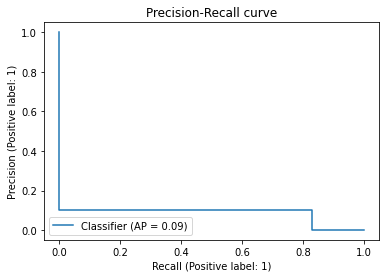

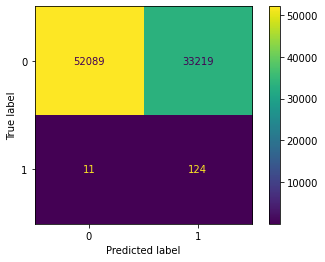

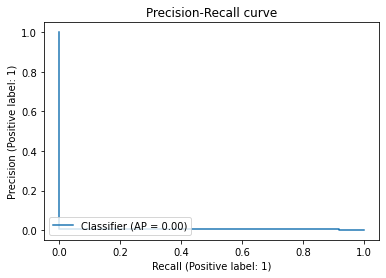

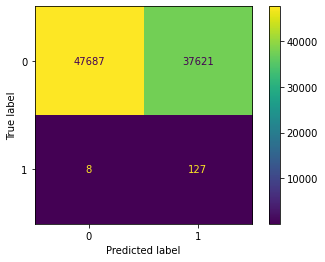

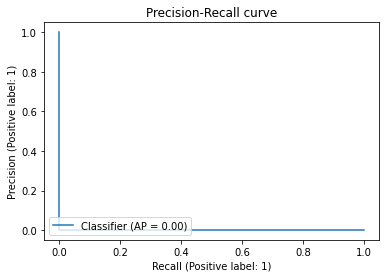

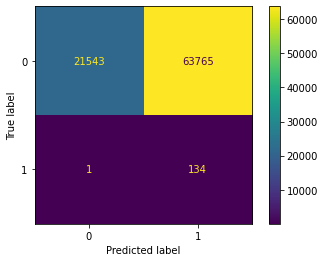

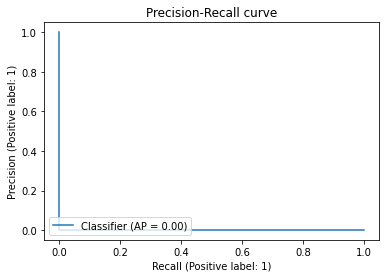

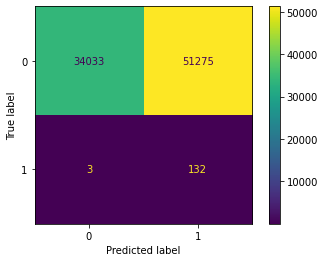

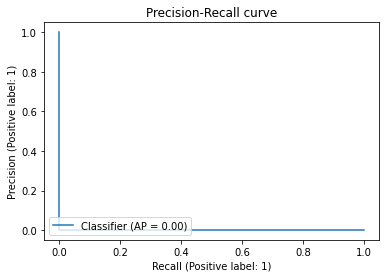

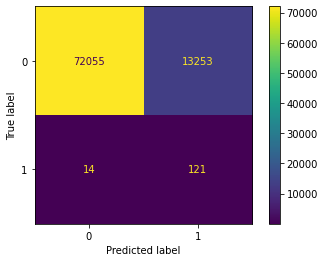

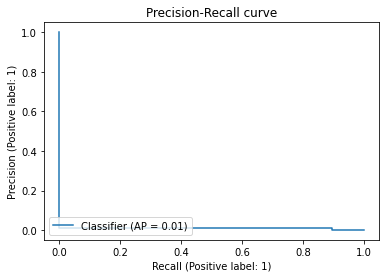

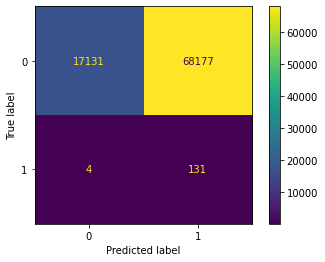

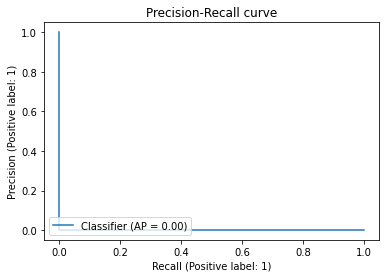

In [30]:
results = train_test_compare(X_train_us, y_train_us, X_test, y_test)

In [31]:
display(results)

,model,train_accuracy,test_acc,train_AP,test_AP
0,LogisticRegression,0.941469,0.988226,0.926878,0.085126
1,KNeighborsClassifier,0.971357,0.611086,0.964217,0.003545
2,MLPClassifier,0.972603,0.559601,0.965773,0.003259
3,RandomForestClassifier,1.000000,0.253701,1.000000,0.002093
4,ADABoostClassifier,0.988792,0.399857,0.985998,0.002546
5,NaiveBayes,0.956413,0.844727,0.945547,0.008273
6,XGBoost,1.000000,0.202029,1.000000,0.001908


#### Observation:
Confusion matrix has very less false negatives but a lot more false positives.


Infact RandomForest performed very bad compared to LogisticRegression now.

The precision is 0 for fraud cases due to too many false positives but recall value for fraud case is good as there are very less false negatives.

This result is not useful.

#### Undersampling is not very helpful
This is possible because my train data after undersampling is very low as compared to my test data.

The model has learnt the data seen in training set very well, but not on test data. Hence it is overfitting.

#### Over Sampling

In [32]:
from imblearn.over_sampling import RandomOverSampler

In [33]:
os = RandomOverSampler(sampling_strategy=0.8, random_state=1) # values closer to 1 lead to perfectly balanced dataset
# Minority_class_after_sampling = 0.8 x Majority_class_before_sampling

X_train_os, y_train_os = os.fit_resample(X_train, y_train)
print("Class distribution before:",Counter(y_train))
print("Class distribution after:",Counter(y_train_os))

Class distribution before: Counter({0: 199007, 1: 357})
Class distribution after: Counter({0: 199007, 1: 159205})


In [ ]:
results = train_test_compare(X_train_os, y_train_os, X_test, y_test)

LogisticRegression Model
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85308
           1       0.08      0.84      0.15       135

    accuracy                           0.98     85443
   macro avg       0.54      0.91      0.57     85443
weighted avg       1.00      0.98      0.99     85443

----------------------------------------------------------------
----------------------------------------------------------------
KNeighborsClassifier Model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.53      0.81      0.64       135

    accuracy                           1.00     85443
   macro avg       0.77      0.90      0.82     85443
weighted avg       1.00      1.00      1.00     85443

----------------------------------------------------------------
----------------------------------------------------------------


In [ ]:
display(results)

#### Observation:
Confusion matrix has less false negatives and less false positives.


RandomForest performed similar to that of baseline.
This result might improve with some hyper-parameter tuning.

#### Oversampling is helpful
This is possible because my train data after oversampling has good balance of the class without reducing the size of the data.

The model has learnt the data seen in training set very well, and able to perfrom decently on test data.

#### Use SMOTE technique
This is different from OverSampling in the sense that it creates new synthetic data points based on neighborhood around the minority class points. OverSampling just creates copies of the minority class points.

In [ ]:
from imblearn.combine import SMOTETomek

In [ ]:
smote = SMOTETomek(sampling_strategy=0.8, random_state=1) # values closer to 1 lead to perfectly balanced dataset
# Minority_class_after_sampling = 0.8 x Majority_class_before_sampling

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("Class distribution before:",Counter(y_train))
print("Class distribution after:",Counter(y_train_smote))

In [ ]:
results = train_test_compare(X_train_smote, y_train_smote, X_test, y_test)


In [ ]:
display(results)

#### Observation:
Confusion matrix has reduced false negatives but increased false positives.


RandomForest performed similar to that of baseline.
This result might improve with some hyper-parameter tuning.

#### SMOTE behaved similar to Oversampling but AP values are lower.

### Based on all the experiments conducted so far Random Forest & k-Nearest Neighbors are best performing algorithm for the given problem. In case of Random Forest it did not make much difference if we use the imbalanced data set or oversampled data set. In case of k-Nearest Neighbors it performed better on the imbalanced data.

#### Exploring if hyper-parameter tuning on random forest increases performance

In [ ]:
n_estimators = [1, 5, 10, 25, 50 ,75, 100 ]
ap_score = []

for n in n_estimators:
    rfc = RandomForestClassifier(n_estimators=n, random_state=1)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    ap_score.append(average_precision_score(y_test, y_pred))


In [ ]:
plt.figure()
plt.plot(n_estimators, ap_score)
plt.xlabel('n_estimators')
plt.ylabel('AP_score')
plt.show()

In [ ]:
best_n = n_estimators[np.argmax(ap_score)]

rfc = RandomForestClassifier(n_estimators=best_n)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
show_performance(y_test, y_pred)

In [ ]:
k = np.array(range(2,20))
ap_score = []

In [ ]:
for i in k:    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    ap_score.append(average_precision_score(y_test, y_pred))   

In [ ]:
plt.figure()
plt.plot(k, ap_score)
plt.xlabel('k')
plt.ylabel('AP_score')
plt.show()

In [ ]:
best_k = k[np.argmax(ap_score)]
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

show_performance(y_test, y_pred)